In [1]:
import dual_autodiff.dual as df 
import dual_autodiff_x.dual as dfx  
import math
from scipy.optimize import approx_fprime  
import matplotlib.pyplot as plt
import numpy as np
from memory_profiler import profile

ModuleNotFoundError: No module named 'memory_profiler'

## Q5.
The function of interest is:
\begin{equation}
f(x) = \ln(\sin(x)) + x^2 \cos(x) \tag{1}
\end{equation}

The analytical derivative is:
\begin{equation}
f'(x) = \frac{\cos(x)}{\sin(x)} + 2x \cos(x) - x^2 \sin(x) \tag{2}
\end{equation}

In [2]:
def f_dual(x):
    """
    Define the function f(x) = log(sin(x)) + x^2 * cos(x) using Dual Numbers.
    Input x is assumed to be a Dual Number.
    """
    return x.sin().log() + (x ** 2) * x.cos()

# Compute derivative using Dual Number method (first implementation)
x = df.Dual(1.5, 1.0)  # Dual Number: real = 1.5, dual = 1.0
y = f_dual(x)
df_dual_val = y.dual
df_dual_val_1 = y.dual
print(f"f'(1.5) using Dual Numbers (Python) = {df_dual_val_1}")

# Compute derivative using Dual Number method (second implementation)
x_x = dfx.Dual(1.5, 1.0)  # Dual Number: real = 1.5, dual = 1.0
y_x = f_dual(x_x)
df_dual_val_2 = y_x.dual
print(f"f'(1.5) using Dual Numbers (Cython) = {df_dual_val_2}")

def f_diff(x):
    """
    Analytical derivative of f(x):
    f'(x) = (cos(x)/sin(x)) + 2x*cos(x) - x^2*sin(x)
    """
    return (math.cos(x) / math.sin(x)) + 2 * x * math.cos(x) - (x ** 2) * math.sin(x)

# Compute derivative using analytical method
df_analytic_val = f_diff(1.5)
print(f"f'(1.5) using Analytical Derivative = {df_analytic_val}")

# Compare deviations
error_1 = abs(df_dual_val_1 - df_analytic_val)
error_2 = abs(df_dual_val_2 - df_analytic_val)

print("\nDeviation Comparison:")
print(f"Deviation (Python Dual Numbers Implementation  vs Analytical) = {error_1}")
print(f"Deviation (Cython Dual Numbers Implementation 2 vs Analytical) = {error_2}")

f'(1.5) using Dual Numbers (Python) = -1.9612372705533612
f'(1.5) using Dual Numbers (Cython) = -1.9612372705533612
f'(1.5) using Analytical Derivative = -1.9612372705533612

Deviation Comparison:
Deviation (Python Dual Numbers Implementation  vs Analytical) = 0.0
Deviation (Cython Dual Numbers Implementation 2 vs Analytical) = 0.0


### Why Use Central Difference for Numerical Differentiation?

The central difference method provides a good balance between accuracy and computational cost. It estimates the derivative as:

$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} $$

Compared to forward or backward differences, central difference has a **second-order accuracy**, meaning the error scales as $O(h^2)$. As the step size $h$ decreases, the error reduces quadratically.


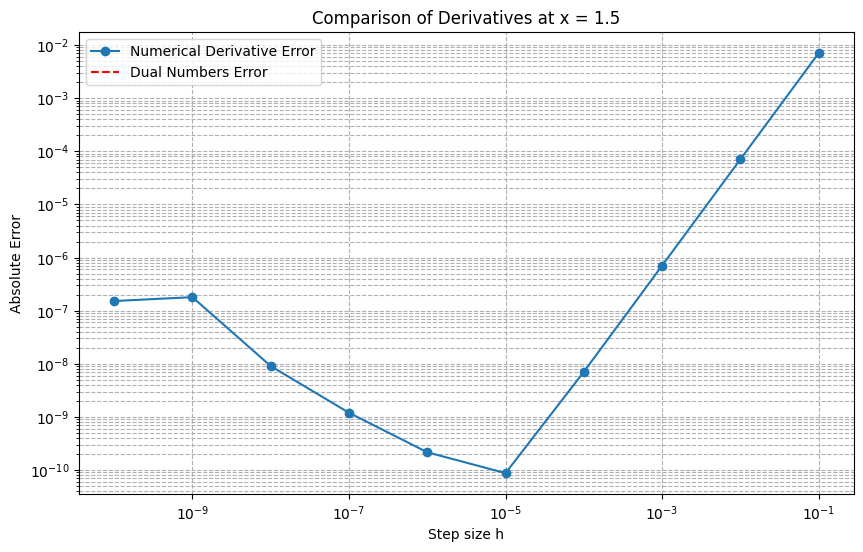

In [3]:
def numerical_derivative(f, x, h):
    # Numerical derivative using central difference
    return (f(x + h) - f(x - h)) / (2 * h)

def f_python(x):
    # Python version of f(x) for numerical derivative, Eq. (1)
    return math.log(math.sin(x)) + (x ** 2) * math.cos(x)

h_values = np.logspace(-10, -1, 10)  # h from 1e-10 to 1e-1
df_numerical_list = []
for h in h_values:
    derivative = numerical_derivative(f_python, 1.5, h)
    df_numerical_list.append(derivative)
numerical_derivatives = np.array(df_numerical_list)

# Calculate absolute errors
numerical_errors = np.abs(numerical_derivatives - df_analytic_val)
dual_error = abs(df_dual_val_1 - df_analytic_val)

# Plot numerical derivatives vs h
plt.figure(figsize=(10, 6))
plt.loglog(h_values, numerical_errors, 'o-', label='Numerical Derivative Error')
plt.axhline(y=dual_error, color='r', linestyle='--', label='Dual Numbers Error')
# plt.axhline(y=0, color='g', linestyle='-', label='Analytical Derivative')


plt.xlabel('Step size h')
plt.ylabel('Absolute Error')
plt.title("Comparison of Derivatives at x = 1.5")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


In [4]:

# Using dual number, compute the differential of f(x) = x^2 * sin(x)
def f_dual(x):
    return x**2 * x.sin()

# Define f(x) for scipy numerical differentiation
def f_numeric(x):
    return x**2 * np.sin(x)

# Test with Python implementation
def test_python():
    x = df.Dual(1.5, 1.0)  # Using Python's Dual implementation
    y = f_dual(x)
    return y.dual  # The derivative is stored in the dual part

# Test with Cython implementation
def test_cython():
    x = dfx.Dual(1.5, 1.0)  # Using Cython's Dual implementation
    y = f_dual(x)
    return y.dual  # The derivative is stored in the dual part

# Test with Scipy numerical differentiation
def test_scipy():
    epsilon = np.sqrt(np.finfo(float).eps)  # Machine epsilon for numerical stability
    grad = approx_fprime([1.5], lambda x: f_numeric(x[0]), epsilon)  # Compute gradient at x = 1.5
    return grad[0]

# Run and print results
print("Testing Python Implementation:")
python_derivative = test_python()
print(f"f'(1.5) using Python Dual Numbers = {python_derivative}")

print("\nTesting Cython Implementation:")
cython_derivative = test_cython()
print(f"f'(1.5) using Cython Dual Numbers = {cython_derivative}")

print("\nTesting Scipy Numerical Differentiation:")
scipy_derivative = test_scipy()
print(f"f'(1.5) using Scipy = {scipy_derivative}")

# Benchmark using %timeit
print("\nBenchmarking...")
import timeit

# Number of evaluations
n = 100000

# Python Implementation Benchmark
python_time = timeit.timeit("test_python()", globals=globals(), number=n)
# print(f"Python Implementation Total Time: {python_time:.6f} seconds for {n} evaluations")
print(f"Python Implementation Per Evaluation: {python_time / n:.6e} seconds per evaluation\n")

# Cython Implementation Benchmark
cython_time = timeit.timeit("test_cython()", globals=globals(), number=n)
# print(f"Cython Implementation Total Time: {cython_time:.6f} seconds for {n} evaluations")
print(f"Cython Implementation Per Evaluation: {cython_time / n:.6e} seconds per evaluation\n")

# Scipy Implementation Benchmark
n_scipy = 1000  # Reduce number of evaluations for Scipy due to slower performance
scipy_time = timeit.timeit("test_scipy()", globals=globals(), number=n_scipy)
# print(f"Scipy Implementation Total Time: {scipy_time:.6f} seconds for {n_scipy} evaluations")
print(f"Scipy Implementation Per Evaluation: {scipy_time / n_scipy:.6e} seconds per evaluation\n")

Testing Python Implementation:
f'(1.5) using Python Dual Numbers = 3.151643663564495

Testing Cython Implementation:
f'(1.5) using Cython Dual Numbers = 3.151643663564495

Testing Scipy Numerical Differentiation:
f'(1.5) using Scipy = 3.1516436636447906

Benchmarking...
Python Implementation Per Evaluation: 1.228273e-06 seconds per evaluation

Cython Implementation Per Evaluation: 5.601000e-07 seconds per evaluation

Scipy Implementation Per Evaluation: 4.038100e-05 seconds per evaluation



In [6]:
# Testing performance in Jupyter Notebook using %timeit
print("Time Benchmarking:")

# Python Implementation Benchmark
%timeit test_python()

# Cython Implementation Benchmark
%timeit test_cython()

# Scipy Implementation Benchmark
%timeit test_scipy()


Time Benchmarking:
1.24 µs ± 12.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
549 ns ± 9.65 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
38.5 µs ± 667 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


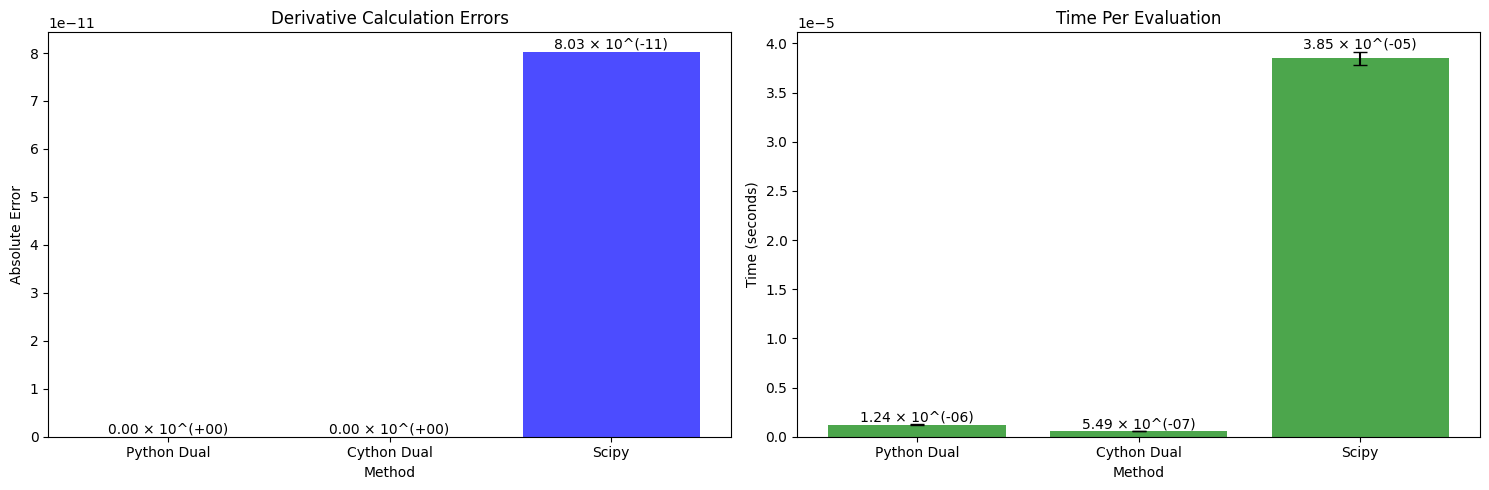

In [10]:
# Analytical derivative (ground truth)
x = 1.5
true_derivative = x**2 * np.cos(x) + 2 * x * np.sin(x)

# Given errors
errors = {
    "Python Dual": abs(python_derivative - true_derivative),
    "Cython Dual": abs(cython_derivative - true_derivative),
    "Scipy": abs(scipy_derivative - true_derivative),
}

# Given time per evaluation (mean ± standard deviation)
times_per_eval = {
    "Python Dual": {"mean": 1.24e-6, "std": 12.5e-9},  # µs ± ns
    "Cython Dual": {"mean": 549e-9, "std": 9.65e-9},
    "Scipy": {"mean": 38.5e-6, "std": 667e-9},
}

# Prepare time data for plotting
methods = list(times_per_eval.keys())
time_means = [times_per_eval[method]["mean"] for method in methods]
time_stds = [times_per_eval[method]["std"] for method in methods]

# Plot errors and time per evaluation side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot errors
bars = axes[0].bar(errors.keys(), errors.values(), alpha=0.7, color='blue')
axes[0].set_title("Derivative Calculation Errors")
axes[0].set_ylabel("Absolute Error")
axes[0].set_xlabel("Method")

# Annotate error bars with scientific notation
for bar in bars:
    height = bar.get_height()
    formatted_height = "{:.2e}".format(height).replace("e", " × 10^(") + ")"
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, formatted_height, 
                 ha='center', va='bottom')

# Plot time per evaluation with error bars
bars = axes[1].bar(methods, time_means, yerr=time_stds, alpha=0.7, color='green', capsize=5)
axes[1].set_title("Time Per Evaluation")
axes[1].set_ylabel("Time (seconds)")
axes[1].set_xlabel("Method")

# Annotate bars with time values in scientific notation
for bar, mean, std in zip(bars, time_means, time_stds):
    formatted_height = "{:.2e}".format(mean).replace("e", " × 10^(") + ")"
    axes[1].text(bar.get_x() + bar.get_width() / 2, mean + std, formatted_height, 
                 ha='center', va='bottom')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


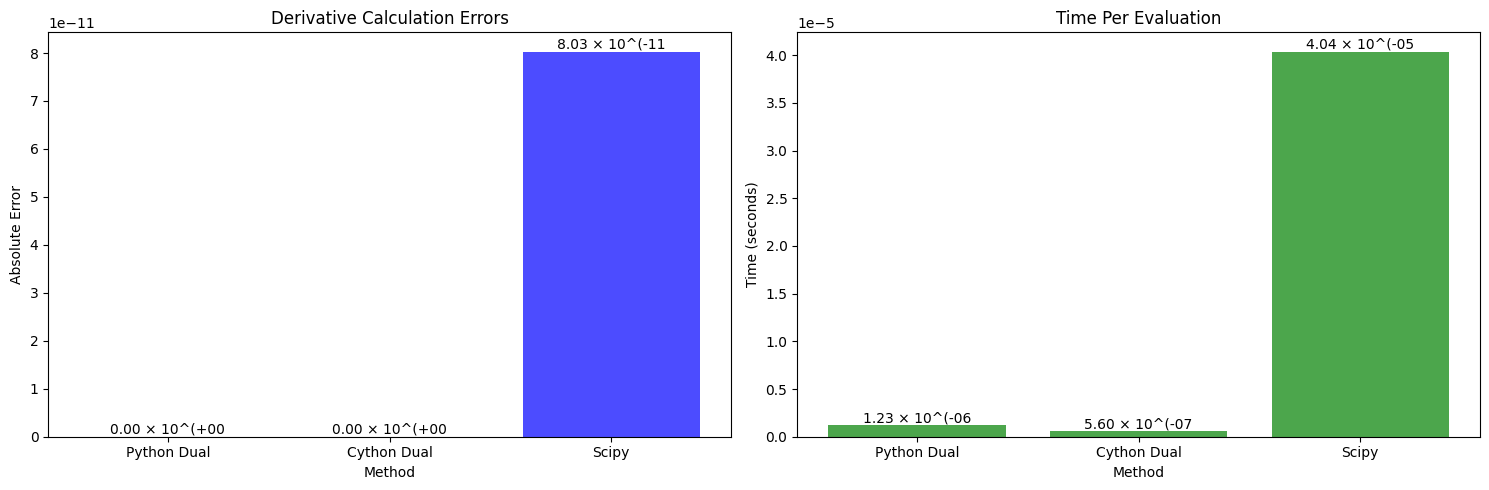

In [7]:


# Error data (assume scipy is ground truth for illustration)
# Function of interest x^2 Sin(x) at x = 1.5, derivative is x^2 cos(x) + 2x sin(x)
x = 1.5
true_derivative =  x**2 * np.cos(x) + 2 * x * np.sin(x)  # Analytical derivative
errors = {
    "Python Dual": abs(python_derivative - true_derivative),
    "Cython Dual": abs(cython_derivative - true_derivative),
    "Scipy": abs(scipy_derivative - true_derivative),
}

# Time per evaluation data
times_per_eval = {
    "Python Dual": python_time / n,
    "Cython Dual": cython_time / n,
    "Scipy": scipy_time / n_scipy,
}

# Plot errors and time per evaluation side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot errors
bars = axes[0].bar(errors.keys(), errors.values(), alpha=0.7, color='blue')
axes[0].set_title("Derivative Calculation Errors")
axes[0].set_ylabel("Absolute Error")
axes[0].set_xlabel("Method")
for bar in bars:
    height = bar.get_height()
    formatted_height = "{:.2e}".format(height).replace("e", " × 10^(")
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, formatted_height, ha='center', va='bottom')

# Plot time per evaluation
bars = axes[1].bar(times_per_eval.keys(), times_per_eval.values(), alpha=0.7, color='green')
axes[1].set_title("Time Per Evaluation")
axes[1].set_ylabel("Time (seconds)")
axes[1].set_xlabel("Method")
for bar in bars:
    height = bar.get_height()
    formatted_height = "{:.2e}".format(height).replace("e", " × 10^(")
    
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, formatted_height, ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
errors

{'Python Dual': np.float64(0.0),
 'Cython Dual': np.float64(0.0),
 'Scipy': np.float64(8.029577003298982e-11)}

In [9]:
np.sqrt(np.finfo(float).eps)


np.float64(1.4901161193847656e-08)